Vitesse moyenne chaque 30 minutes

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = './Position_paris_reims.csv'
data = pd.read_csv(file_path)

In [3]:
time = data['time_minutes'].to_numpy()
position = data['position_km'].to_numpy()

In [6]:
interval = 30
results = []
index = 0

In [9]:
idx_start = np.searchsorted(time, index, side='left')
idx_end = np.searchsorted(time, index + interval, side='left')

if idx_start < len(time) and idx_end < len(time):
    print("Index début :", idx_start, " - Temps correspondant :", time[idx_start])
    print("Index fin :", idx_end, " - Temps correspondant :", time[idx_end])
else:
    print("Indices hors des limites : idx_start =", idx_start, ", idx_end =", idx_end)

Index début : 0  - Temps correspondant : 0.0
Index fin : 14  - Temps correspondant : 30.0


In [ ]:
#for t in range(0, int(time[-1]), interval):
    # Trouver l'index correspondant à t et t + 30 minutes
#    idx_start = np.searchsorted(time, t, side='left')
#    idx_end = np.searchsorted(time, t + interval, side='left')
#    print("Index début :", idx_start, " - Temps correspondant :", time[idx_start])
#    print("Index fin :", idx_end, " - Temps correspondant :", time[idx_end])
    

In [14]:
# Parcourir les intervalles
for t in range(0, int(time[-1]), interval):
    # Trouver l'index correspondant à t et t + 30 minutes
    idx_start = np.searchsorted(time, t, side='left')
    idx_end = np.searchsorted(time, t + interval, side='left')

    # Vérifier si les indices sont valides
    if idx_start < len(time) and idx_end < len(time):
        # Obtenir les positions correspondantes
        pos_start = position[idx_start]
        pos_end = position[idx_end]

        # Calculer la vitesse moyenne
        avg_speed = (pos_end - pos_start) / interval  # Vitesse en km/min
        avg_speed_kmh = avg_speed * 60  # Convertir en km/h

        # Ajouter le résultat
        results.append((t, t + interval, avg_speed_kmh))

    else:
        # Ajouter un résultat vide si pas de données
        results.append((t, t + interval, None))

In [15]:
# Afficher les résultats
for start, end, speed in results:
    if speed is not None:
        print(f"De {start} à {end} minutes : vitesse moyenne = {speed:.2f} km/h")
    else:
        print(f"De {start} à {end} minutes : pas de données disponibles.")

De 0 à 30 minutes : vitesse moyenne = 74.32 km/h
De 30 à 60 minutes : vitesse moyenne = 87.58 km/h
De 60 à 90 minutes : vitesse moyenne = 65.38 km/h
De 90 à 120 minutes : vitesse moyenne = 49.10 km/h
De 0 à 30 minutes : vitesse moyenne = 74.32 km/h
De 30 à 60 minutes : vitesse moyenne = 87.58 km/h
De 60 à 90 minutes : vitesse moyenne = 65.38 km/h
De 90 à 120 minutes : vitesse moyenne = 49.10 km/h


Exercice 1

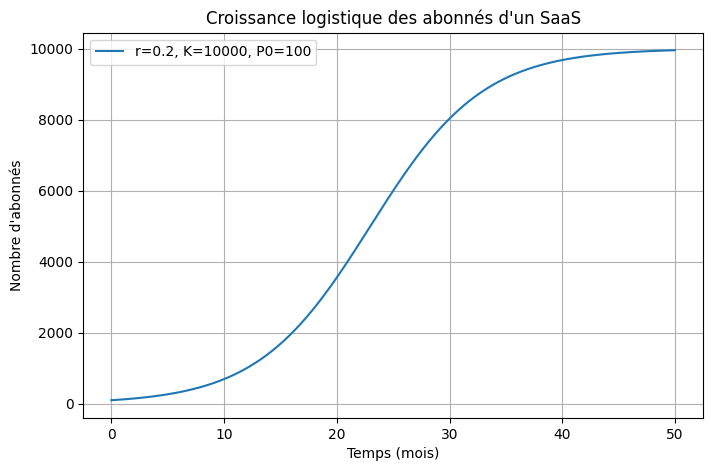

In [1]:
import numpy as np
import matplotlib.pyplot as plt

K = 10000
r = 0.2
P0 = 100
t = np.linspace(0, 50, 500)

def population_logistique(t, r, K, P0):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

P = population_logistique(t, r, K, P0)

plt.figure(figsize=(8, 5))
plt.plot(t, P, label=f"r={r}, K={K}, P0={P0}")
plt.title("Croissance logistique des abonnés d'un SaaS")
plt.xlabel("Temps (mois)")
plt.ylabel("Nombre d'abonnés")
plt.legend()
plt.grid(True)
plt.show()

Exercice 2

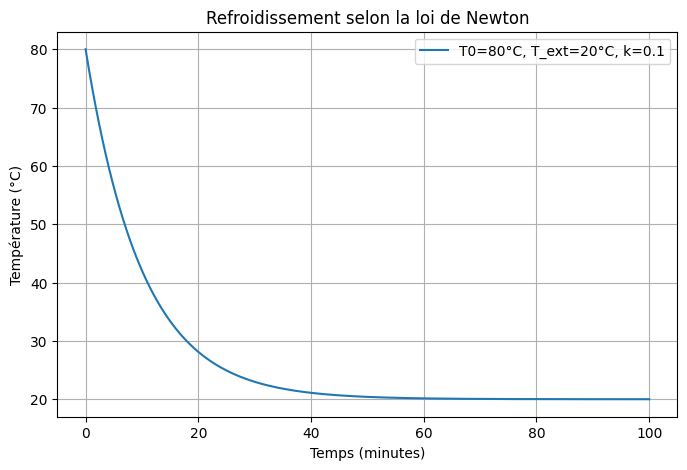

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T_ext = 20
T0 = 80
k = 0.1
t = np.linspace(0, 100, 500)

def refroidissement_newton(t, T0, T_ext, k):
    return T_ext + (T0 - T_ext) * np.exp(-k * t)

T = refroidissement_newton(t, T0, T_ext, k)

plt.figure(figsize=(8, 5))
plt.plot(t, T, label=f"T0={T0}°C, T_ext={T_ext}°C, k={k}")
plt.title("Refroidissement selon la loi de Newton")
plt.xlabel("Temps (minutes)")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.show()

Exercice 3

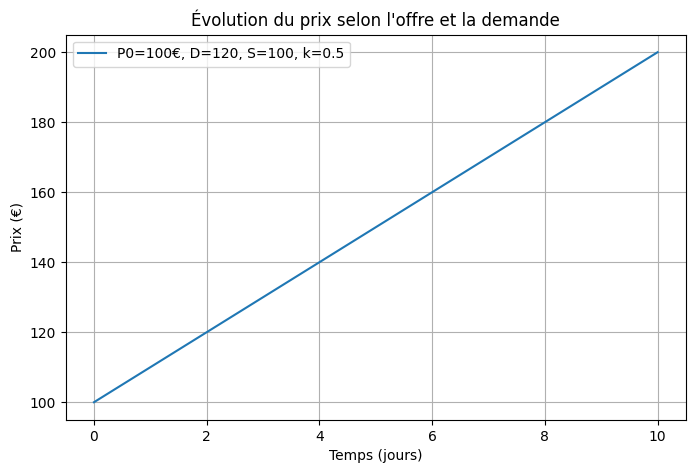

In [3]:
import numpy as np
import matplotlib.pyplot as plt

P0 = 100
D = 120
S = 100
k = 0.5
t = np.linspace(0, 10, 100)

def evolution_prix(t, P0, D, S, k):
    return P0 + k * (D - S) * t

P = evolution_prix(t, P0, D, S, k)

plt.figure(figsize=(8, 5))
plt.plot(t, P, label=f"P0={P0}€, D={D}, S={S}, k={k}")
plt.title("Évolution du prix selon l'offre et la demande")
plt.xlabel("Temps (jours)")
plt.ylabel("Prix (€)")
plt.legend()
plt.grid(True)
plt.show()

Méthode Euler

Valeurs obtenues par Euler: [1.     1.5    2.25   3.375  5.0625]
Valeurs exactes: [1.         1.64872127 2.71828183 4.48168907 7.3890561 ]
Erreur quadratique moyenne (MSE): 1.3758


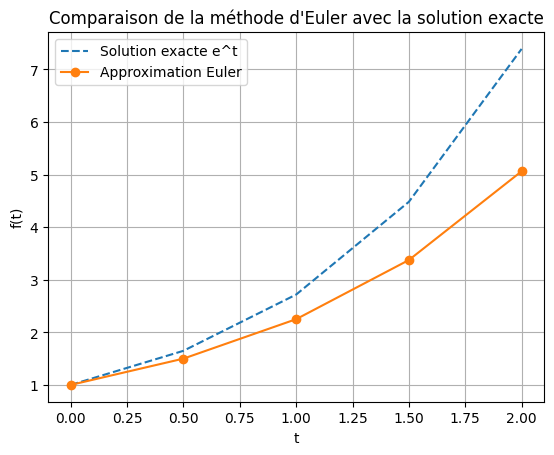

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.5
t_values = np.arange(0, 2.5, h)
n_steps = len(t_values)

exact_solution = np.exp(t_values)

f_values = np.zeros(n_steps)
f_values[0] = 1

for i in range(1, n_steps):
    f_values[i] = f_values[i - 1] + h * f_values[i - 1]

mse = np.mean((f_values - exact_solution) ** 2)

print("Valeurs obtenues par Euler:", f_values)
print("Valeurs exactes:", exact_solution)
print(f"Erreur quadratique moyenne (MSE): {mse:.4f}")

plt.plot(t_values, exact_solution, label="Solution exacte e^t", linestyle="dashed")
plt.plot(t_values, f_values, label="Approximation Euler", marker="o")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.title("Comparaison de la méthode d'Euler avec la solution exacte")
plt.grid()
plt.show()